## 4. Handling Outliers in the Boston Housing Dataset
   - Task: Identify and handle outliers in the Boston Housing dataset using techniques like Z-score, IQR, and visualization methods.
   - Dataset: Boston Housing Dataset


## Loading Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df = pd.read_csv('/kaggle/input/bostonhoustingmlnd/housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Plotting to See Outliers

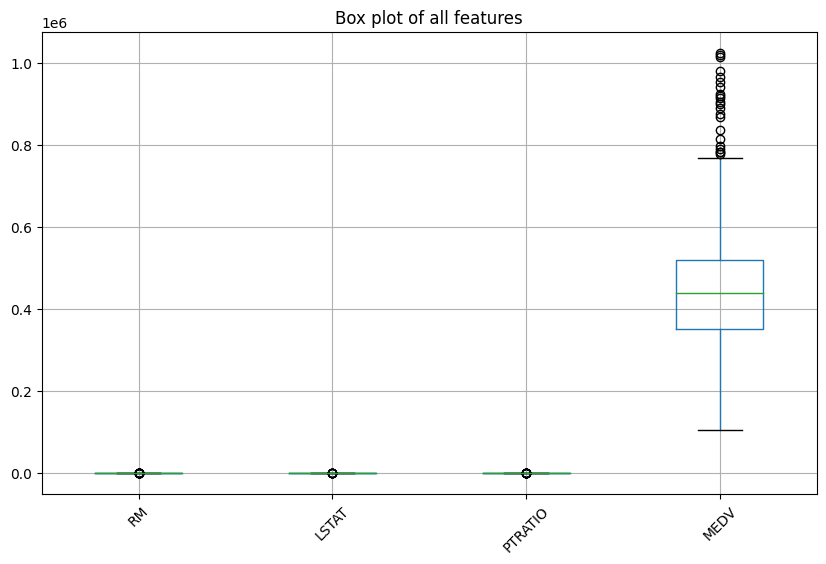

In [3]:
# Plot box plots for each feature

plt.figure(figsize=(10, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Box plot of all features')
plt.show()

## Outlier Removal Method

In [4]:

# Calculate Z-scores
z_scores = np.abs(zscore(df))

# Identify outliers
z_outliers = np.where(z_scores > 3)
print("Z-score outliers:", z_outliers)


Z-score outliers: (array([141, 197, 217, 220, 224, 225, 225, 245, 253, 253, 270, 272, 353,
       355, 356, 357, 357, 389, 395, 397]), array([1, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 1, 0, 1, 0, 1, 1]))


In [5]:
# Calculate IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
iqr_outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print("IQR outliers:\n", iqr_outliers)


IQR outliers:
         RM  LSTAT  PTRATIO   MEDV
0    False  False    False  False
1    False  False    False  False
2    False  False    False  False
3    False  False    False  False
4    False  False    False  False
..     ...    ...      ...    ...
484  False  False    False  False
485  False  False    False  False
486  False  False    False  False
487  False  False    False  False
488  False  False    False  False

[489 rows x 4 columns]


In [6]:
# Remove outliers using IQR method
boston_data_cleaned = df[~iqr_outliers.any(axis=1)]

# Display the shape of the dataset before and after removing outliers
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", boston_data_cleaned.shape)


Original dataset shape: (489, 4)
Cleaned dataset shape: (444, 4)


## Plotting after 

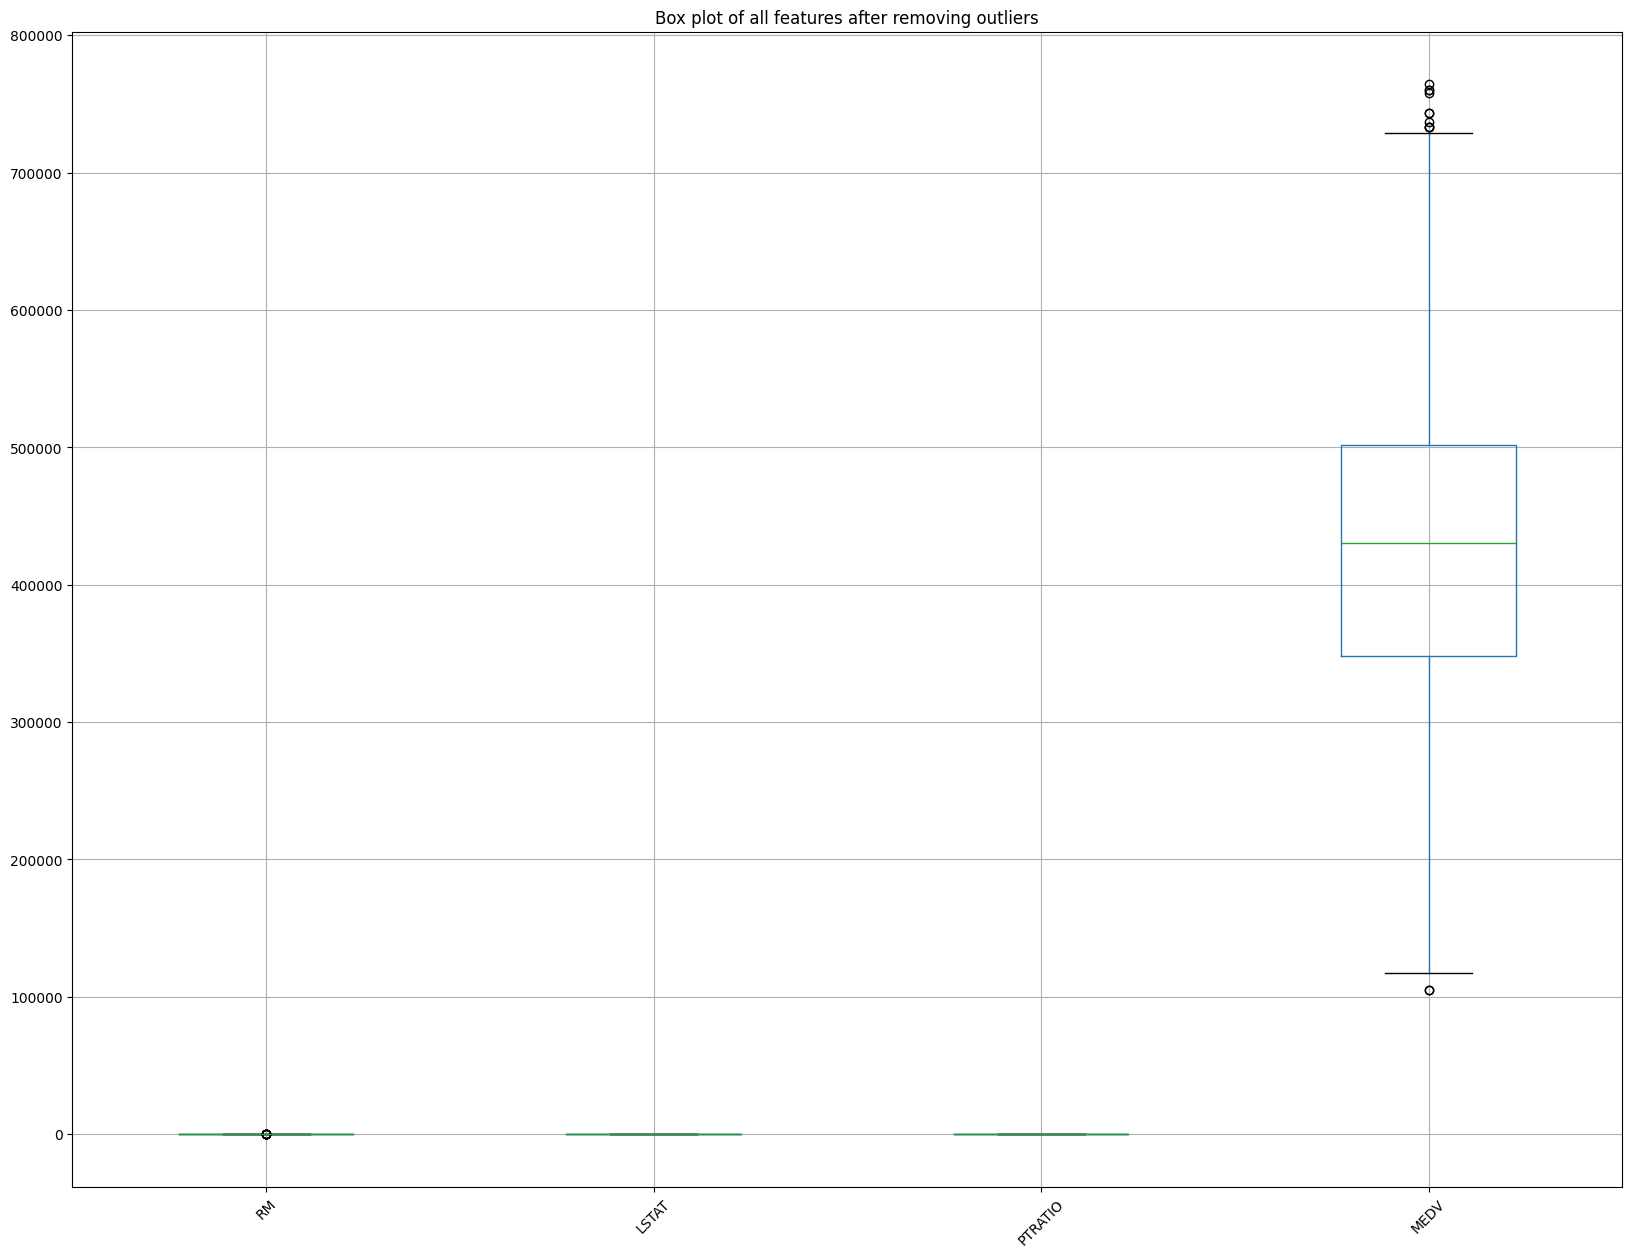

In [7]:
# Plot box plots for each feature after removing outliers

plt.figure(figsize=(20, 15))
boston_data_cleaned.boxplot()
plt.xticks(rotation=45)
plt.title('Box plot of all features after removing outliers')
plt.show()
